In [1]:
%matplotlib inline
import chap01soln
import numpy as np
resp = chap01soln.ReadFemResp()

In [2]:
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a PMF of numkdhh, the number of children under 18 in the respondents house hold

In [3]:
n = resp.numkdhh.sum()

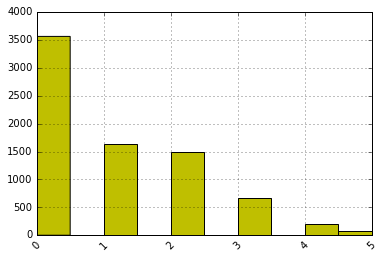

In [30]:
resp.numkdhh.hist(grid = 1, xlabelsize = 10, xrot = 45, color = 'y')

In [5]:
pmf = resp.numkdhh.value_counts().sort_index()/len(resp.numkdhh)

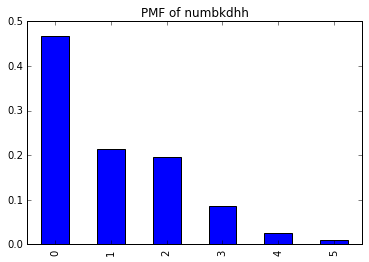

In [6]:
pmf.plot(kind = 'bar', label = 'numkdhh', title = 'PMF of numbkdhh')

##### 

In [78]:
#  convert series to dataframe
pmfdf = pmf.to_frame()
pmfdf.columns

Index([u'numkdhh'], dtype='object')

In [105]:
# There has to be a better way to accomplish this
# index represent values found in resp, action is to find the product of values and probability
pmfdf['biasedpmf'] = pmfdf['numkdhh'].map(lambda x: (x * pmf[pmf == x].index[0]))

In [113]:
pmfdf['biasedpmf'] = pmfdf.biasedpmf.map(lambda x: x / pmfdf.biasedpmf.sum())
pmfdf.columns = ['pmf', 'biasedpmf']
pmfdf

,pmf,biasedpmf
0,0.466178,0.000000
1,0.214052,0.208993
2,0.196258,0.383240
3,0.087139,0.255238
4,0.025644,0.100153
5,0.010729,0.052376


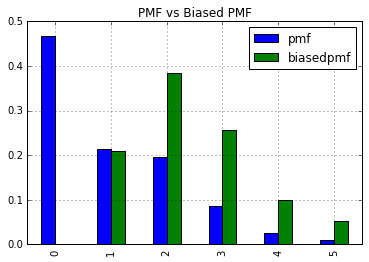

In [136]:
pmfdf.plot(kind = 'bar', title = 'PMF vs Biased PMF', grid = True)

This makes sense. The biasedpmf is a representation of your results should you have asked the children how many children are in the household.
Naturally, a household with no children will have zero probability of response. A household with 2 children will have twice the number of responses as when we asked the parents. 

Find the mean of the number of children

In [128]:
resp.numkdhh.mean(), resp.numkdhh.var() 

(1.024205155043831, 1.413049207840536)

Find the biased mean of the number of children (the anecdotal mean

In [127]:
pmfdf['biasedpmf'].map(lambda x: (x * pmfdf[pmfdf.biasedpmf == x].index[0])).sum()

2.403679100664282